In [183]:
import pandas as pd
import numpy as np
import statistics
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from collections import Counter
from nltk.tokenize import RegexpTokenizer

## Read Data and Simple Cleaning

In [105]:
menu = pd.read_csv(r"menupages.csv")

In [106]:
menu = menu.dropna() #drop 140 rows containing na values

In [107]:
menu.head()

,city,menu_descriptions,menu_items,menu_prices,restaurant_name,state,tags
0,Bakersfield,Savory filling with chicken and vegetables wra...,"6 Piece Fried Potstickers,Bowl Special,Combo B...","$6.59\n ,$8.99\n ,$10.39\n ,$11...",China Bistro,CA,"Asian, Chinese, Dinner, Healthy, Lunch, Seafoo..."
1,Bell Gardens,"4 pieces deep-fried egg roll, mixed veggies an...","A1. Thai Egg Roll,7. Classic Thai Grilled Stea...","$4.50\n ,$9.50\n ,$4.50\n ,$2.5...",The Rice Street,CA,"Asian, Dinner, Lunch Specials, Noodles, Seafoo..."
2,Bellflower,"Add pastrami for $2.00.,Pepsi, diet pepsi, spr...","Chili Cheese Fries,8 Pieces Fried Mozzarella S...","$4.99\n ,$5.99\n ,$2.99\n ,$0.7...",Tam's Pizzeria,CA,"Dinner, Hamburgers, Lunch Specials, Pasta, Piz..."
3,Bell Gardens,One skewer of beef and one skewer of chicken. ...,"Soda,The Classic Cheeseburger,Kabob Plate,Soda...","$2.69\n ,$4.49\n ,$12.99\n ,$2....",World Famous Grill,CA,"Dinner, Hamburgers, Lunch Specials, Mediterran..."
5,Bellflower,Sauteed chow mein noodles with vegetables. Cho...,"P2. Chow Mein,F1. Fried Rice,F2. Pineapple Fri...","$8.95\n ,$9.95\n ,$11.95\n ,$1....",Royal's Taste,CA,"Dessert, Dinner, Lunch, Lunch Specials, Noodle..."


In [108]:
#functions for cleaning data
def priceseperator(a):
    '''
    a: a row in the menu dataframe. Ex: menu.iloc[1]
    result: return a list of numerical prices
    '''
    full = a['menu_prices'][1:].replace(",","")+"$"
    result = full.split("\n      $")
    del result[len(result)-1]
    result = [float(i) for i in result]
    return result

def itemseperator(a):
    result = a['menu_items'].split(",")
    return result

def tagseperator(a):
    result = a['tags'].replace(" ","").split(",")
    return result

def remove_punc(df, index):
    tokenizer = RegexpTokenizer(r'\w+')
    return_series = []
    for row in df.itertuples():
        tokens = tokenizer.tokenize(row[index])
        words = [word for word in tokens if word.isalpha()]
        words = (' ').join(words)
        return_series.append(words)
    print(len(return_series))    
    return pd.Series(return_series)

In [109]:
i = 0
while i<len(menu):
    menu.iloc[i]['menu_prices']=priceseperator(menu.iloc[i])
    i = i+1

## Create New Dataframe

In [99]:
i = 0
total_tags = []
tags_num = []
while i<len(menu):
    temp = tagseperator(menu.iloc[i])
    total_tags = total_tags+temp
    tags_num.append(len(temp))
    i = i+1

In [118]:
i = 0
state_new = []
restaurant_name_new = []
menu_prices_new = []

menu1 = menu.head()
while i<len(menu):
    j = 0
    tagsnum_this = tags_num[i]
    while j<tagsnum_this:
        state_new.append(menu.iloc[i]['state'])
        restaurant_name_new.append(menu.iloc[i]['restaurant_name'])
        menu_prices_new.append(menu.iloc[i]['menu_prices'])
        j = j+1
    i = i+1

In [124]:
menu_new = pd.DataFrame({'restaurant_name':restaurant_name_new, 
                         'menu_prices':menu_prices_new, 
                        'state':state_new,
                        'tags':total_tags})
menu_new.to_csv(r'menupages_new.csv', index = None)

,restaurant_name,menu_prices,state,tags
0,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Asian
1,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Chinese
2,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Dinner
3,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Healthy
4,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Lunch


## Aggregate Price on State and Tags

In [131]:
i = 0
avg_price = []
while i<len(menu_new):
    temp = statistics.mean(menu_new.iloc[i]['menu_prices'])
    avg_price.append(temp)
    i = i+1
menu_new['avg_prices'] = avg_price

In [137]:
i = 0
avg_price1 = []
while i<len(menu):
    temp = statistics.mean(menu.iloc[i]['menu_prices'])
    avg_price1.append(temp)
    i = i+1
menu['avg_prices'] = avg_price1

In [151]:
median_by_state = menu.groupby(['state'])['avg_prices'].median().sort_values(ascending = False)
median_by_tags = menu_new.groupby(['tags'])['avg_prices'].median().sort_values(ascending = False)

mean_by_state = menu.groupby(['state'])['avg_prices'].mean().sort_values(ascending = False)
mean_by_tags = menu_new.groupby(['tags'])['avg_prices'].mean().sort_values(ascending = False)

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


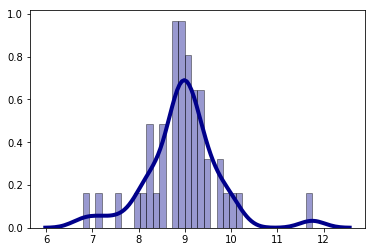

In [167]:
sns.distplot(median_by_state.values, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


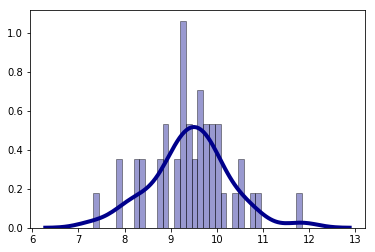

In [168]:
sns.distplot(mean_by_state.values, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


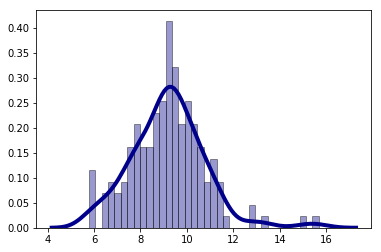

In [169]:
sns.distplot(median_by_tags.values, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

/opt/anaconda3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


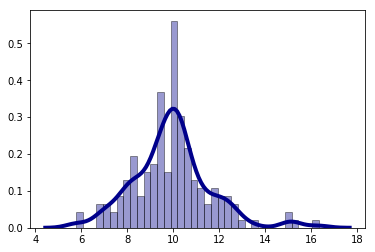

In [182]:
sns.distplot(mean_by_tags.values, hist=True, kde=True, 
             bins=int(180/5), color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})

In [185]:
#menu.head()
menu_state = menu[['restaurant_name','menu_prices','state','tags','avg_prices']]

In [186]:
menu_state.head()

,restaurant_name,menu_prices,state,tags,avg_prices
0,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,"Asian, Chinese, Dinner, Healthy, Lunch, Seafoo...",12.385146
1,The Rice Street,"[4.5, 9.5, 4.5, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5, ...",CA,"Asian, Dinner, Lunch Specials, Noodles, Seafoo...",6.537879
2,Tam's Pizzeria,"[4.99, 5.99, 2.99, 0.78, 1.29, 1.14, 6.99, 5.9...",CA,"Dinner, Hamburgers, Lunch Specials, Pasta, Piz...",6.687647
3,World Famous Grill,"[2.69, 4.49, 12.99, 2.69, 2.49, 3.49, 3.49, 3....",CA,"Dinner, Hamburgers, Lunch Specials, Mediterran...",5.634533
5,Royal's Taste,"[8.95, 9.95, 11.95, 1.0, 1.5, 2.5, 4.0, 4.0, 4...",CA,"Dessert, Dinner, Lunch, Lunch Specials, Noodle...",9.511538


## Most Popular Restaurant Names

In [180]:
menu_new.head()

,restaurant_name,menu_prices,state,tags,avg_prices
0,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Asian,12.385146
1,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Chinese,12.385146
2,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Dinner,12.385146
3,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Healthy,12.385146
4,China Bistro,"[6.59, 8.99, 10.39, 11.69, 27.99, 4.49, 6.39, ...",CA,Lunch,12.385146


In [178]:
remove_punc(menu,5).values

20628


array(['China Bistro', 'The Rice Street', 'Tam s Pizzeria', ...,
       'The Village Cookery', 'Bombay Indian Grill', 'Wing Zone'],
      dtype=object)

## Analysis on Low Average Price Restaurants

In [53]:
#analysis on low average price restaurants

#clean menu_prices column
i = 0
while i<len(menu):
    temp = priceseperator(menu.iloc[i])
    menu.iloc[i]['menu_prices'] = temp
    i = i + 1

#calculate avg price for each restaurant
price = []
i = 0
while i<len(menu):
    price.append(statistics.mean(menu.iloc[i]['menu_prices']))
    i = i + 1

#upper and lower 2.5% bound for avg price
a = round(np.percentile(price, 2.5),2)
b = round(np.percentile(price, 97.5),2)
print(a,b)

#restaurant index of low price
i = 0
lowprice = []
while i < len(price):
    if price[i] <= 4.5:
        lowprice.append(i)
    i = i + 1

#tags of restaurants with low price
lowtag = []
for p in lowprice:
    temp = tagseperator(menu.iloc[p])
    lowtag = lowtag + temp

#top 10 tags of low price    
count_lowtag = Counter(lowtag)
count_lowtag.most_common(10)

count_lowtag = Counter(lowtag)
count_lowtag.most_common(10)